In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px

pio.renderers.default = 'iframe_connected'

# Load cleaned dataset
df = pd.read_csv('../../data/clean/video_game_sales_final_cleaned.csv')

# Basic info
df.info()
df.describe()

# Check nulls again
print(df.isnull().sum())

# Preview
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59379 entries, 0 to 59378
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             59379 non-null  object 
 1   platform         59379 non-null  object 
 2   year_of_release  59379 non-null  int64  
 3   genre            59379 non-null  object 
 4   publisher        59379 non-null  object 
 5   na_sales         59379 non-null  float64
 6   eu_sales         59379 non-null  float64
 7   jp_sales         59379 non-null  float64
 8   other_sales      59379 non-null  float64
 9   global_sales     59379 non-null  float64
 10  rating           16447 non-null  object 
 11  rating_grouped   16447 non-null  object 
 12  name_clean       59379 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 5.9+ MB
name                   0
platform               0
year_of_release        0
genre                  0
publisher              0
na_sales      

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,rating,rating_grouped,name_clean
0,wii sports,WII,2006,sports,Nintendo,41.36,28.96,3.77,8.45,82.53,E,Children,wii sports
1,super mario bros.,NES,1985,platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Unrated,Unrated,super mario bros
2,mario kart wii,WII,2008,racing,Nintendo,15.68,12.76,3.79,3.29,35.52,E,Children,mario kart wii
3,wii sports resort,WII,2009,sports,Nintendo,15.61,10.93,3.28,2.95,32.77,E,Children,wii sports resort
4,pokemon red/pokemon blue,GB,1996,role-playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Unrated,Unrated,pokemon redpokemon blue


In [2]:
df['genre'].value_counts()


genre
action          11107
other            7334
sports           5526
adventure        5398
shooter          4873
rpg              4001
strategy         3406
puzzle           3243
racing           3231
simulation       2909
platformer       2735
misc             1721
role-playing     1483
platform          878
fighting          837
visual novel      322
music             163
party              84
mmo                74
board game         22
education          17
sandbox            15
Name: count, dtype: int64

## Dataset Overview

###  General Info:
- **Total entries**: 59,379  
- **Columns**: 13  
- **Data types**: 5 floats, 1 integer, 7 objects  
- **Memory usage**: ~5.9 MB  

---

###  Key Columns:
- `name`, `platform`, `genre`, `publisher`, `rating`, `rating_grouped` → *Categorical*
- `na_sales`, `eu_sales`, `jp_sales`, `other_sales`, `global_sales` → *Continuous numeric (float)*
- `year_of_release` → *Numeric (but represents time)*

---

###  Missing Values:
- `rating` and `rating_grouped`: Only ~16,447 non-null values → **significant missing data**
- All other columns are fully populated

---

###  Duplicates:
- Consider checking with `df.duplicated().sum()`
- The `name_clean` column may help identify re-releases or duplicates

---

###  Top Observations:
- **Most repeated game**: `doom` (16 times) — likely due to re-releases on multiple platforms
- **Most common publisher**: `Sega` with 2,326 titles
- **Sales skew**: Most games sold **very little**  
  - Mean of `global_sales`: ~0.17 million units  
  - Max value: **82.5 million units**
- Distribution is **highly right-skewed**


In [5]:
print(f'Duplicated rows: {df.duplicated().sum()}')


Duplicated rows: 0


In [7]:
df['year_of_release'] = df['year_of_release'].astype(int)


In [76]:
filtered_df = df[df['global_sales'] < 1]

fig = px.histogram(
    filtered_df,
    x='global_sales',
    nbins=10,
    title="How Many Games Sell Under 1 Million Copies?",
    color_discrete_sequence=['indianred']
)

fig.update_layout(
    xaxis_title='Global Sales (millions)',
    yaxis_title='Number of Game Released',
    template='simple_white',
    title_x=0.5,
    width=1000,  # Set desired width
    height=600   # Set desired height
)


fig.show()


In [78]:
platform_sales = (
    df.groupby('platform', as_index=False)['global_sales']
    .sum()
    .query('global_sales > 100').head(10) 
    .sort_values(by='global_sales', ascending=False)
)

fig = px.bar(
    platform_sales,
    x='global_sales',
    y='platform',
    orientation='h',
    title='Which consoles dominate global sales?',
    color='platform',
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(
    xaxis_title='global sales (millions)',
    yaxis_title='platform',
    title_x=0.5,
    template='simple_white',
    showlegend=False
)

fig.show()

In [27]:
filtered_df = df[df['global_sales'] < 1]

fig = px.histogram(
    filtered_df,
    x='global_sales',
    nbins=40,
    title="What's the typical sales range for most games?",
    color_discrete_sequence=['indianred']
)

fig.update_layout(
    xaxis_title='Global Sales (millions)',
    yaxis_title='Number of Games',
    template='simple_white',
    title_x=0.5
)

fig.show()

In [29]:
platform_sales = df.groupby('platform', as_index=False)['global_sales'].sum()

platform_sales = platform_sales[platform_sales['global_sales'] > 100]

platform_sales = platform_sales.sort_values(by='global_sales', ascending=False)

fig = px.bar(
    platform_sales,
    x='global_sales',
    y='platform',
    orientation='h',
    title='Which consoles dominate global sales?',
    color_discrete_sequence=['indianred']  # Color uniforme
)

fig.update_layout(
    xaxis_title='Global Sales (millions)',
    yaxis_title='Platform',
    title_x=0.5,
    template='simple_white',
    width=1000,
    height=600,
    showlegend=False
)

fig.show()

In [31]:
genre_sales = (
    df.groupby('genre', as_index=False)['global_sales']
    .sum()
    .sort_values(by='global_sales', ascending=False)
)

top_genres = genre_sales.head(10)

fig = px.bar(
    top_genres,
    x='genre',
    y='global_sales',
    title='Which genres are the most profitable?',
    color='genre',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    text='global_sales'
)

fig.update_traces(
    texttemplate='%{text:.1f}',
    textposition='outside'
)

fig.update_layout(
    xaxis_tickangle=-40,
    title_x=0.5
)

fig.show()



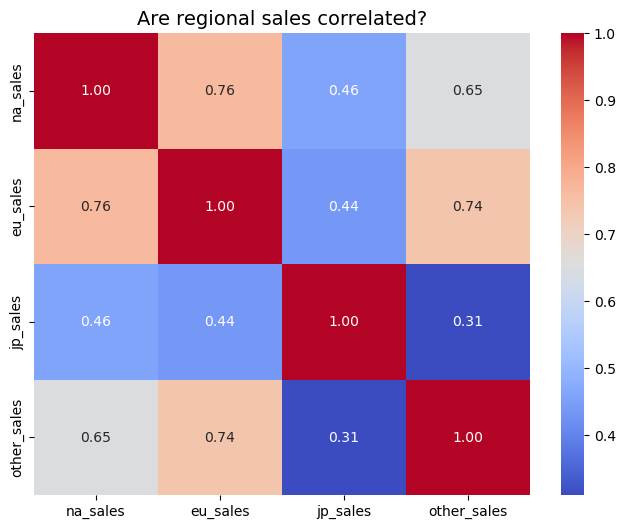

In [33]:
region_sales = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

correlation_matrix = region_sales.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Are regional sales correlated?", fontsize=14)
plt.show()

Sales in North America and Europe are strongly correlated, indicating similar market trends. However, Japan consistently shows low correlation with other regions, suggesting a distinct gaming culture and preferences.

In [36]:
top_publishers = (
    df.groupby('publisher', as_index=False)['global_sales']
    .sum()
    .sort_values(by='global_sales', ascending=False)
    .head(10)
)

fig = px.bar(
    top_publishers,
    x='publisher',
    y='global_sales',
    color='publisher',
    title="Who are the top-selling publishers?",
    text='global_sales',
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')
fig.update_layout(
    xaxis_title='Publisher',
    yaxis_title='Global Sales (millions)',
    title_x=0.5,
    template='simple_white',
    showlegend=False
)

fig.show()

In [38]:
yearly_releases = (
    df.groupby('year_of_release', as_index=False)
    .agg(game_count=('name', 'count'))
    .sort_values(by='year_of_release')
)

fig = px.line(
    yearly_releases,
    x='year_of_release',
    y='game_count',
    title='Are game releases declining over time?',
    markers=True
)

fig.update_layout(
    xaxis_title='Year of Release',
    yaxis_title='Number of Games Released',
    title_x=0.5,
    template='simple_white',
    width=900,
    height=500
)

fig.show()


The video game industry evolved from an era of explosive growth in releases to a more selective and mature phase. Today, fewer titles are launched, but they tend to be higher-budget and longer in scope.

- Notably, the sharp decline in game releases after 2019 may also reflect the effects of the COVID-19 pandemic, which disrupted production pipelines, delayed launches, and shifted development workflows across the industry.

- Between 2009–2012, game releases declined sharply due to the rise of mobile gaming, a shift to digital platforms, and preparation for new console generations. This context is key; while fewer games were released, more effort was focused on larger, higher-budget titles.

In [41]:
region_sales_long = df.melt(
    value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
    var_name='region',
    value_name='sales'
)

fig = px.box(
    region_sales_long,
    x='region',
    y='sales',
    color='region',
    title='Do regional preferences shape game sales?',
    color_discrete_sequence=px.colors.qualitative.Set2,
    points='outliers'  # Mostrar outliers
)

fig.update_layout(
    yaxis_title='Sales (millions)',
    xaxis_title='Region',
    title_x=0.5,
    template='simple_white',
    width=800,
    height=500,
    showlegend=False
)

fig.show()

In [42]:
year_sales = (
    df.groupby('year_of_release', as_index=False)['global_sales']
    .sum()
    .sort_values(by='year_of_release')
)

year_sales['cumulative_sales'] = year_sales['global_sales'].cumsum()

fig = px.area(
    year_sales,
    x='year_of_release',
    y='cumulative_sales',
    title="When did the video game boom really happen?",
    labels={'year_of_release': 'Year', 'cumulative_sales': 'Cumulative Global Sales (millions)'},
    template='simple_white',
    width=900,
    height=500
)

fig.update_layout(
    title_x=0.5,
    xaxis=dict(dtick=5),
)

fig.show()

In [44]:
region_totals = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

region_df = region_totals.reset_index()
region_df.columns = ['region', 'total_sales']

fig = px.pie(
    region_df,
    names='region',
    values='total_sales',
    title="Who really drives global video game sales?",
    color_discrete_sequence=px.colors.sequential.RdBu,
    hole=0.4  
)

fig.update_layout(title_x=0.5)

fig.show()


In [45]:
top_games = df[['name', 'global_sales']].sort_values(by='global_sales', ascending=False).head(10)

fig = px.bar(
    top_games,
    x='global_sales',
    y='name',
    orientation='h',
    title='Who are the top-selling games of all time?',
    text='global_sales',
    color='name',
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')

fig.update_layout(
    xaxis_title='Global Sales (millions)',
    yaxis_title='Game Title',
    title_x=0.5,
    template='simple_white',
    showlegend=False,
    height=500
)

fig.show()


In [70]:
top_platforms = df.groupby('platform', as_index=False)['global_sales'].sum()
top_10_platforms = top_platforms.sort_values(by='global_sales', ascending=False).head(10)['platform']

filtered_df = df[df['platform'].isin(top_10_platforms)]

top_per_platform = filtered_df.sort_values('global_sales', ascending=False).drop_duplicates('platform')

fig = px.treemap(
    top_per_platform,
    path=['platform', 'name'],
    values='global_sales',
    title="Which game leads the Top 10 platforms?",
    color='platform',
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.update_layout(
    title_x=0.5,
    width=1000,  # Set desired width
    height=600   # Set desired height
)
fig.show()

In [68]:
## import plotly.express as px

# Filter games released from 2015 onwards
recent = df[df['year_of_release'] >= 2015]

# Get top 4 platforms by total global sales in that period
top_recent_platforms = (
    recent.groupby('platform')['global_sales']
    .sum()
    .sort_values(ascending=False)
    .head(4)
    .index
)

# Filter games only from those top platforms
subset = recent[recent['platform'].isin(top_recent_platforms)]

# Get top 6 games per platform
top_games = (
    subset.groupby(['platform', 'name'], as_index=False)['global_sales']
    .sum()
    .sort_values(['platform', 'global_sales'], ascending=[True, False])
    .groupby('platform')
    .head(6)
)

# Create treemap
fig = px.treemap(
    top_games,
    path=['platform', 'name'],
    values='global_sales',
    title='What are the most played games on recent platforms?',
    color='platform',
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.update_layout(title_x=0.5)
fig.show()



> **Disclaimer:** This dataset focuses on physical sales and excludes most digital distribution.  
> Recent platforms and PC games may be underrepresented. 
